<a href="https://colab.research.google.com/github/spatank/CIS-545/blob/master/project_SPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive

# mount google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
os.chdir('gdrive/MyDrive/CIS545_2020/Project')
!ls

adj.mat  AED_matrices.npy  AED_matrices.npz  project_SPP.ipynb


In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import savemat
import networkx as nx

In [4]:
vars = np.load('AED_matrices.npz', allow_pickle = True)
for item in vars.files:
  print(item)

arr_0
arr_1
arr_2


In [5]:
total_adj = vars['arr_0']
time_var_adj = vars['arr_1']
med_names = vars['arr_2']

In [6]:
def transpose(matrix):
    num_lists_in_transpose = len(matrix[0])
    transpose_matrix = [] # initialize empty transpose matrix
    for i in range(num_lists_in_transpose): 
        list_for_transpose = [] # begin building each transpose list
        for original_list in matrix: 
            # index the element from the non-tranpose list and place it 
            # in the tranposed list corresponding to the index
            list_for_transpose.append(original_list[i])
        transpose_matrix.append(list_for_transpose)
    return transpose_matrix

In [7]:
# num_age_groups = time_var_adj.shape[2] # years of longitudinal data
num_age_groups = 25 # i.e., up to age num_age_groups - 1
upper_tri_indices = np.triu_indices(20, k = 1)
edges_across_time = []
for idx in range(1, num_age_groups):
  curr_adj_mat = time_var_adj[:, :, idx]
  if np.sum(curr_adj_mat) != 0:
    curr_adj_mat = curr_adj_mat/np.sum(curr_adj_mat) # normalize
  edges_across_time.append(curr_adj_mat[upper_tri_indices])
edges_across_time = transpose(edges_across_time)

In [8]:
all_variances = [np.nanvar(lst) for lst in edges_across_time]
ranked = np.argsort(all_variances)
high_variance_edge_IDs = ranked[::-1][:len(ranked)]

row_indices = upper_tri_indices[0]
col_indices = upper_tri_indices[1]
all_edges = []
for idx in range(len(row_indices)):
  all_edges.append(tuple([med_names[row_indices[idx]], med_names[col_indices[idx]]]))

high_variance_edges = []
for edge_ID in high_variance_edge_IDs:
  high_variance_edges.append([edge_ID, all_edges[edge_ID], all_variances[edge_ID]])

In [9]:
high_variance_edges

[[2, ('LEV', 'PHB'), 0.00011628936924657349],
 [12, ('LEV', 'TPM'), 6.550237837304726e-05],
 [63, ('PHB', 'TPM'), 5.6813198701241136e-05],
 [1, ('LEV', 'LTG'), 5.554304748463777e-05],
 [0, ('LEV', 'OXC'), 3.6293287725316696e-05],
 [3, ('LEV', 'VPA'), 2.9844916913088486e-05],
 [78, ('VPA', 'TPM'), 2.5905683352538364e-05],
 [38, ('LTG', 'VPA'), 2.1305706442083122e-05],
 [169, ('TPM', 'VGB'), 2.0801889957231464e-05],
 [47, ('LTG', 'TPM'), 1.4012259131008937e-05],
 [20, ('OXC', 'PHB'), 1.104887250480918e-05],
 [43, ('LTG', 'ZNS'), 9.688988117384666e-06],
 [58, ('PHB', 'FOS'), 9.652536277311175e-06],
 [57, ('PHB', 'PHT'), 8.160721618285564e-06],
 [13, ('LEV', 'VGB'), 7.853046738491718e-06],
 [19, ('OXC', 'LTG'), 7.726746039504257e-06],
 [10, ('LEV', 'LCM'), 7.623468897074727e-06],
 [6, ('LEV', 'PHT'), 7.503177134722007e-06],
 [8, ('LEV', 'ZNS'), 6.575553857238382e-06],
 [74, ('VPA', 'ZNS'), 6.208877025556563e-06],
 [7, ('LEV', 'FOS'), 6.108976693042862e-06],
 [76, ('VPA', 'LCM'), 5.91175522

Text(0, 0.5, 'Normalized Co-prescription')

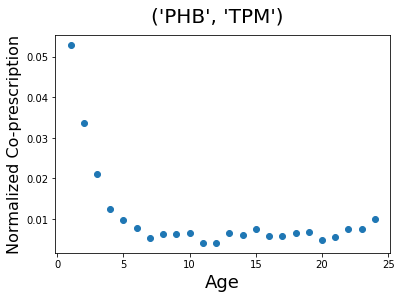

In [10]:
edge = 2
fig = plt.figure()
plt.scatter(list(range(1, len(edges_across_time[edge]) + 1)), edges_across_time[edge])
fig.suptitle(str(high_variance_edges[edge][1]), fontsize = 20)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Normalized Co-prescription', fontsize = 16)

Text(0, 0.5, 'Normalized Co-prescription')

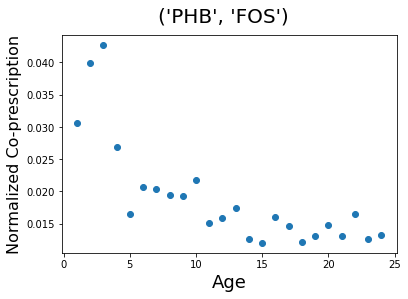

In [11]:
edge = 12
fig = plt.figure()
plt.scatter(list(range(1, len(edges_across_time[edge]) + 1)), edges_across_time[edge])
fig.suptitle(str(high_variance_edges[edge][1]), fontsize = 20)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Normalized Co-prescription', fontsize = 16)

Text(0, 0.5, 'Normalized Co-prescription')

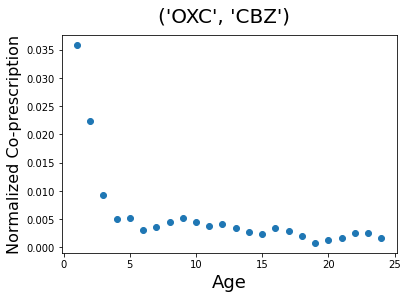

In [12]:
edge = 63
fig = plt.figure()
plt.scatter(list(range(1, len(edges_across_time[edge]) + 1)), edges_across_time[edge])
fig.suptitle(str(high_variance_edges[edge][1]), fontsize = 20)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Normalized Co-prescription', fontsize = 16)

Text(0, 0.5, 'Normalized Co-prescription')

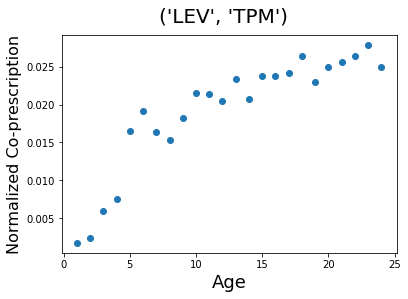

In [13]:
edge = 1
fig = plt.figure()
plt.scatter(list(range(1, len(edges_across_time[edge]) + 1)), edges_across_time[edge])
fig.suptitle(str(high_variance_edges[edge][1]), fontsize = 20)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Normalized Co-prescription', fontsize = 16)

In [14]:
len(edges_across_time)

190